### Import Model Sklearn & NLP to fit value text

In [4]:
# from pythainlp import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from pythainlp.word_vector import thai2vec 
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from pythainlp.tokenize import word_tokenize,sent_tokenize
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.cluster import hierarchy
import dill as pickle
import pandas as pd
import pythainlp.word_vector
# model = word_vector.get_model()
model_path = 'thwiki_data/models/'

### read date problem

In [6]:
df = pd.read_csv("data/dataReV5.csv")
df

,Vehicle,restaurant,food delivery,Problem,score,work,เวลาในการรออาหาร,ราคาอาหาร
0,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",Promotions,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,51-100บาท
1,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิว ขี้เกียจเดิน จะทำงาน,ไม่มีอะไรน่ากิน,3.0,2 - 3 ชั่วโมง,6 - 10 นาที,51-100บาท
2,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",เพราะร้านที่อยากกินอยู่ไกล บางทีก็อยู่ในเวลาเร...,ถ้าคิวยาวก็ไม่ซื้อ,8.6,1 - 2 ชั่วโมง,6 - 10 นาที,100-200 บาท
3,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",ขี้เกียจเดินออกไปกินข้างนอก,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,1 - 2 ชั่วโมง,6 - 10 นาที,300-500 บาท
4,รถประจำทาง,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",อยากกินร้านนั้น,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,100-200 บาท
5,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",ไม่อะไรกิน,ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ,7.8,มากกว่า 3 ชั่วโมง,6 - 10 นาที,100-200 บาท
6,รถจักรยานยนต์,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",เบื่ออาหารที่อยู่ในคณะ และค่าอาหารพร้อมจัดส่งท...,ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่ก...,8.8,2 - 3 ชั่วโมง,6 - 10 นาที,51-100บาท
7,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",เร็ว ได้กินอาหารที่อยากกิน,ไม่มีร้านอาหารที่ชอบ,3.2,น้อยกว่า 1 ชั่วโมง,6 - 10 นาที,51-100บาท
8,รถมอไซค์,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ร้านน้ำ,...","เวลา, ความสะดวก, สถานที่",ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา,8.4,2 - 3 ชั่วโมง,6 - 10 นาที,0-50 บาท
9,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ร้านน้ำ",ความขี้เกียจ และร้านอาหารไกลเกินไป,ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน,8.0,มากกว่า 3 ชั่วโมง,1 - 5 นาที,100-200 บาท


In [7]:
text = df['Problem'].dropna().rename(columns = {"Problem": "problem"})
text

0               ถ้าคนเยอะก็ไม่อยากไปต่อคิว
1                          ไม่มีอะไรน่ากิน
2                       ถ้าคิวยาวก็ไม่ซื้อ
3     ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น
4               ถ้าแถวยาวมากก็จะขี้เกียจรอ
                      ...                 
64                ร้านไม่เปิดในช่วงปิดเทอม
65                          คนเยอะรอคิวนาน
66                         ไม่อยากไปต่อแถว
67               ไม่อยากกินอาหารที่ขายอยู่
68            อาหารเหลือแต่ร้านที่ไม่อร่อย
Length: 69, dtype: object

### Import NLP Spit text

In [8]:
from pythainlp import word_tokenize, Tokenizer

In [9]:
sentences_newmm= []
sentences_longest= []

for x in text:
    proc_newmm = word_tokenize(x, engine='newmm', keep_whitespace=False)
    proc_longest = word_tokenize(x, engine='longest', keep_whitespace=False)

    lst_newmm = []
    lst_longest = []
    
    for word in proc_newmm:
        if(word != " "):
            lst_newmm.append(word)
    sentences_newmm.append(lst_newmm)
    for word in proc_longest:
        if(word != " "):
            lst_longest.append(word)
    sentences_longest.append(lst_longest)

In [10]:
model_nlp = pythainlp.word_vector.get_model()

In [11]:
def sentence_vectorizer(ss,dim=300,use_mean=True): # ประกาศฟังก์ชัน sentence_vectorizer
    s = word_tokenize(ss)
    vec = np.zeros((1,dim))
    for word in s:
#         if word in model_nlp.wv.index2word: 
#             vec+= model_nlp.wv.word_vec(word)
        if word in model_nlp.index2word: 
            vec+= model_nlp.word_vec(word)
        else: pass
    if use_mean: vec /= len(s)
    return vec

lst_vector = []
for i in text:
    lst_vector.append(sentence_vectorizer(i)[0])
X=np.array(lst_vector)
print(X)
# text

[[-1.00567597e-01 -1.27915803e-01  1.43477401e-01 ...  2.76386910e-01
  -1.70062402e-01 -4.73427492e-01]
 [ 2.90021330e-01 -4.17456659e-02  2.44560341e-01 ... -2.69656678e-02
  -9.02133373e-03  3.56803313e-02]
 [-2.24298332e-02 -8.48581667e-02  7.54751674e-02 ...  1.85578171e-01
  -9.97570058e-02 -3.78829824e-01]
 ...
 [-8.40125967e-02 -1.83691007e-01  2.10356402e-01 ...  1.57500415e-01
  -1.81059796e-01 -4.68102390e-01]
 [-5.45194253e-02  7.63940002e-02  1.29256144e-01 ...  2.69724432e-01
  -7.95957119e-02 -1.14440563e-01]
 [ 3.51500387e-04 -2.55971832e-01  1.02588498e-01 ...  1.13420837e-01
  -1.39443330e-01 -3.14016889e-03]]


In [12]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

###  Import  scipy.spatial  distance

In [13]:
from scipy.spatial import distance
import numpy.matlib

In [14]:
def elbow_method(data,k):
    clusters = [KMeans(n_clusters = c,init = 'k-means++').fit(data) for c in k]
    centr_lst = [cc.cluster_centers_ for cc in clusters]
    k_distance = [distance.cdist(data, cent, 'euclidean') for cent in centr_lst]
    clust_indx = [np.argmin(kd,axis=1) for kd in k_distance]
    distances = [np.min(kd,axis=1) for kd in k_distance]
    avg_within = [np.sum(dist)/data.shape[0] for dist in distances]
    return avg_within

In [15]:
def elbow_point(curve):
    n_points = len(curve)
    all_coord = np.vstack((range(n_points), curve)).T
    np.array([range(n_points), curve])
    first_point = all_coord[0]
    line_vec = all_coord[-1] - first_point
    line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))
    vec_from_first = all_coord - first_point
    scalar_product = np.sum(vec_from_first * np.matlib.repmat(line_vec_norm, n_points, 1), axis=1)
    vec_from_first_parallel = np.outer(scalar_product, line_vec_norm)
    vec_to_line = vec_from_first - vec_from_first_parallel
    dist_to_line = np.sqrt(np.sum(vec_to_line ** 2, axis=1))
    print(dist_to_line)
    idx_best = np.argmax(dist_to_line)
    return idx_best

In [16]:
elbow=elbow_point(wcss)
elbow.dtype

[0.         1.39149625 1.73326974 1.70225491 1.96419532 1.72298978
 1.31853195 0.73664343 0.48717062 0.        ]


dtype('int64')

Optimal Cluster Number:  5


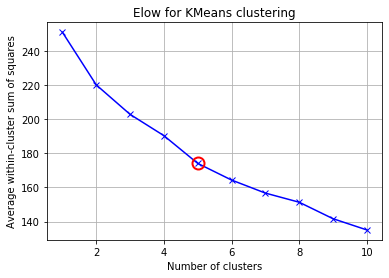

In [17]:
n = len(wcss)+1
K= range(1, n)

print("Optimal Cluster Number: ",K[elbow])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, wcss, 'bx-')
ax.plot(K[elbow], wcss[elbow], marker='o', markersize=12,markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
# ax.set_xticks(np.arange(0,n,1))
# ax.set_yticks(np.arange(0,max(wcss),0.5))
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elow for KMeans clustering')
plt.show();

In [18]:
n_clusters = K[elbow]
clf = KMeans(n_clusters=n_clusters,
            max_iter=100,
            init='k-means++',
            n_init=1)
labels = clf.fit_predict(X)
labels

array([2, 0, 3, 2, 3, 2, 3, 1, 3, 3, 1, 0, 2, 2, 1, 3, 1, 0, 4, 0, 0, 3,
       0, 3, 0, 1, 3, 1, 3, 3, 2, 0, 2, 3, 4, 4, 3, 3, 3, 1, 0, 1, 0, 1,
       4, 4, 1, 3, 4, 3, 1, 2, 1, 3, 4, 3, 3, 2, 2, 2, 0, 3, 3, 1, 4, 2,
       2, 1, 1], dtype=int32)

In [19]:
n_clusters = K[elbow]
clf = KMeans(n_clusters=n_clusters,
            max_iter=100,
            init='k-means++',
            n_init=1)
labels = clf.fit_predict(X)
labels
cluster = []
value = []
o = ""
for index, sentence in enumerate(sentences_newmm):
#     print(str(labels[index]) + ":" + str(sentence))
    cluster.append(labels[index])
#     value.append(o.join(sentences_newmm[index]))
#     list_of_cluster = list(zip(cluster))
text_cluster = pd.DataFrame({"cluster":cluster})  


In [20]:
text_cluster

,cluster
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,2
8,1
9,1


In [21]:
# df_cluster = pd.DataFrame(list_of_cluster, columns = ['cluster', 'text'])  
df_cluster = df [['Problem','score']]
df_cluster.append(text_cluster, ignore_index = True)
df_cluster["cluster"] = text_cluster.values

c:\users\pack.apichart\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
c:\users\pack.apichart\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
# df_cluster = pd.DataFrame(list_of_cluster, columns = ['cluster', 'text'])  
df_cluster

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,1
1,ไม่มีอะไรน่ากิน,3.0,1
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,1
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,1
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,1
5,ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ,7.8,1
6,ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่ก...,8.8,1
7,ไม่มีร้านอาหารที่ชอบ,3.2,2
8,ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา,8.4,1
9,ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน,8.0,1


###  Speech Recognition

In [23]:
import speech_recognition as sr
# Record Audio
r = sr.Recognizer()
m = sr.Microphone()

In [24]:
#set threhold level
with m as source: r.adjust_for_ambient_noise(source)
print("Set minimum energy threshold to {}".format(r.energy_threshold))

# Speech recognition using Google Speech Recognition
def checkspeech(r):
#     file_wav
#     sr.Microphone()  sr.WavFile(file_wav)
#     with sr.WavFile("C:/Users/Pack.Apichart/Desktop/re/t1.wav")
    print("Wake UP!!")
    with  sr.Microphone()  as source:
        audio = r.listen(source)
    try:
    # for testing purposes, we're just using the default API key
    # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
    # instead of `r.recognize_google(audio)`

# "en-US"
# "th-TH"
        print("You said: " + r.recognize_google(audio,language = "th-TH"))
        return r.recognize_google(audio,language = "th-TH")
#         return (r.recognize_google(audio))
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
        return "stop now"
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))
        return "Could not request results from Google Speech Recognition service"



Set minimum energy threshold to 237.66926742532544


In [25]:
# speech = str(checkspeech(r))

In [26]:
# speech_list = []
# speech_list.append(sentence_vectorizer(str(speech))[0])
# speech_vector = np.array(speech_list)
# result = clf.predict(speech_vector)
# result

### Weigth score Text

In [27]:
speech = str(checkspeech(r))

In [28]:
speech_list = []
speech_list.append(sentence_vectorizer(str(speech))[0])
speech_vector = np.array(speech_list)
speech_result = clf.predict(speech_vector)
speech_result

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,1
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,1
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,1
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,1
5,ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ,7.8,1
6,ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่ก...,8.8,1
9,ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน,8.0,1
15,ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน,8.0,1
17,ไม่รู้จะกินอะไร,4.4,1
40,ไม่รู้จะกินอะไร,3.8,1


### Weigth score Text

In [25]:
# def sentence_similarity(s1,s2):
#     for i in s2:
#         print(cosine_similarity(sentence_vectorizer(str(s1)),sentence_vectorizer(str(i))))
# #     return cosine_similarity(sentence_vectorizer(str(s1)),sentence_vectorizer(str(s2)))


In [29]:
### Function weigth score

[3]


In [30]:
def sentence_similarity(s1,s2):
    for i in s2:
        cosine_similarity(sentence_vectorizer(str(s1)),sentence_vectorizer(str(i)))
    return cosine_similarity(sentence_vectorizer(str(s1)),sentence_vectorizer(str(s2)))


In [31]:
# print(sentence_similarity("มีเวลาน้อย","มีเวลาพักไม่พอต่อคิว"))
# print(sentence_similarity("มีเวลาน้อย","มีเวลาน้อยไม่สามารถต่อคิวได้"))
# print(sentence_similarity("มีเวลาน้อย","มีเวลาพักกินข้าวน้อย"))
# print(sentence_similarity("มีเวลาน้อย","ร้านอาหารมีจำนวนไม่มากพอที่จะรับจำนวนนักศึกษา"))
# print(sentence_similarity("มีเวลาน้อย","ร้านอาหารมีคิวเยอะ"))


[[0.66221347]]
[[0.73685298]]
[[0.93237675]]
[[0.55630793]]
[[0.53002163]]


In [32]:
df_cluster[df_cluster['cluster']==speech_result[0]]

,Problem,score,cluster
13,มีเวลาน้อยไม่สามารถต่อคิวได้,7.4,3
18,ไม่มีโต๊ะนั่งกินข้าว,5.8,3
23,มีเวลาพักกินข้าวน้อย,6.8,3
26,หาโต๊ะนั่งไม่ได้,6.2,3
34,มาทำงานวันหยุดไม่มีร้านอาหารเปิด,5.4,3
35,ทำงานดึกทำให้ไม่มีร้านอาหารเปิด,6.2,3
36,ร้านอาหารมีจำนวนไม่มากพอที่จะรับจำนวนนักศึกษา,6.6,3
44,ร้านอาหารไม่เปิดให้บริการในเวลาดึก,5.8,3
45,ไม่มีร้านอาหารเปิดในวันหยุด,6.0,3
48,ร้านไม่รับโอน,3.8,3


In [38]:
text2222 = ["รอคิวนาน", "เบื่อเมนูอาหาร", "คิวเยอะ", "อาหารหมด"]
group_text = []
l = []

for y in text2222:
    l.append(sentence_vectorizer(y)[0])
KL=np.array(l)
labels_newProblem = clf.predict(KL)
group_text.append(labels_newProblem)

for countgroup in range(len(labels_newProblem)):
    state_score = ""
    state_similarity = 0
    for i in df_cluster[df_cluster['cluster']==labels_newProblem[countgroup]].values:
        check_similarity = sentence_similarity(text2222[countgroup],i[0])
        if(check_similarity > state_similarity):
            state_similarity = check_similarity
            state_score = i[1]

#         print(check_similarity,i[0],": score",i[1])
    print(text2222[countgroup], "group: ", labels_newProblem[countgroup], "similarity: " ,state_similarity[0][0], "score :" , state_score)
   

รอคิวนาน group:  4 similarity:  0.8410794182587716 score : 8.4
เบื่อเมนูอาหาร group:  0 similarity:  0.9587626309283312 score : 4.0
คิวเยอะ group:  4 similarity:  0.6575477671602833 score : 8.8
อาหารหมด group:  0 similarity:  1.0 score : 7.2


Vehicle	restaurant	food delivery	Problem	score	work	เวลาในการรออาหาร	ราคาอาหาร

In [34]:
df_cluster[df_cluster['cluster']==labels_newProblem[0]]

,Problem,score,cluster
1,ไม่มีอะไรน่ากิน,3.0,4
8,ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา,8.4,4
12,โรงอาหารคนเยอะทำให้ไม่อยากซื้อ,7.6,4
21,ร้านอาหารมีคิวเยอะ,8.4,4
28,คณะอื่นเยอะมาก อาหารซ้ำซาก บางทีอยากกินแถวซอยห...,8.2,4
29,"ควันเยอะ, ร้อน, แมลงวัน ไม่ค่อยน่านั่ง",4.8,4
30,คนเยอะ ต่อคิวนาน,8.2,4
32,ขี้เกียจต่อแถว,8.0,4
33,คนเยอะ เบื่ออาหารในคณะ วุ่นวาย ร้อน,5.4,4
37,โดนลัดคิว,8.8,4


In [35]:
print(sentence_similarity("มีเวลาน้อย","มีเวลาพักกินข้าวน้อย"))
l = []

# l.append(sentence_vectorizer("ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น")[0])
l.append(sentence_vectorizer("มีเวลาน้อย")[0])

KL=np.array(l)
labels = clf.predict(KL)
print(labels)

[[0.93237675]]
[3]


### WRITE SCORE TO DATA SET

In [ ]:
#  new_df = pd.DataFrame({
#         'Vehicle' : [''],
#         'restaurant' : [''],
#         'food delivery' : [''],
#         'Problem' : [labels_newProblem[countgroup]],
#         'score' : [state_score],
#         'work' : [''],
#         'เวลาในการรออาหาร' : [''],
#         'ราคาอาหาร' : ['']
#     })
#     new_df.to_csv('data/dataReV5.csv', mode='a', header=False)